In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### Lectura CSV Victor
pd.set_option('display.max_columns',None)
datos = pd.read_csv('rend_2016a2022_modificado.csv',encoding='latin-1')
datos.head()

FileNotFoundError: ignored

In [ ]:
datos = pd.read_excel('/content/drive/MyDrive/rend_2016a2022_modificadoxls.xlsx',sheet_name="REND",skiprows=0)

# Extraccion de datos
Separo los datos de las materias que me interesan. La materia 'principal' es calculo 2, de esta voy a sacar los alumnos

In [ ]:
c2 = datos[datos['Asignatura'] == 'CALCULO 2']
c2 = c2[c2.Anho!=2020]
c2 = c2[c2.Anho!=2016]
# Descartamos las columnas del 2020
c2 = c2.drop(['4P'],axis=1)
c2 = c2.drop(['4P_60'],axis=1)
c2 = c2.drop(['3P'],axis=1)

# Ordenamos el dataset

In [ ]:
c2.sort_values("Idalumno",ascending=True)


,Idalumno,Cod.Asign,Asignatura,Cod.Car.Sec,Semestre,Convocatoria,Anho,Ciclo,Aprobado,Firma.Anho,...,Requisito,1R,2R,Nota.Final,periodo1,periodo2,periodo3,P1F,P2F,P3F
84,19,13008,CALCULO 2,MCT-PLS13,2,1,2019,1,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,29,13008,CALCULO 2,ELE-PLS13,2,1,2017,1,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
280,29,13008,CALCULO 2,ELE-PLS13,2,2,2019,2,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,29,13008,CALCULO 2,ELE-PLS13,2,1,2022,1,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,63,13008,CALCULO 2,ELE-PLS13,2,1,2019,1,0,2019,...,1,12,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174958,4460,13008,CALCULO 2,MCT-PLS13,2,1,2017,1,1,2016,...,1,0,0,3F-C-3,NaN,NaN,3F,NaN,NaN,19.0
175127,4462,13008,CALCULO 2,CIV-PLS13,2,1,2022,1,1,2022,...,1,24,42,3F-2,NaN,NaN,3F,NaN,NaN,16.0
175290,4470,13008,CALCULO 2,IND-PLS13,2,1,2022,1,1,2022,...,1,22,0,"3F-2,2F-1",NaN,2F,3F,NaN,13.0,19.0
175284,4470,13008,CALCULO 2,IND-PLS13,2,2,2021,2,0,0,...,1,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Verificamos si hay datos faltantes

In [ ]:
c2.isna().sum()/len(c2)*100

Idalumno         0.000000
Cod.Asign        0.000000
Asignatura       0.000000
Cod.Car.Sec      0.000000
Semestre         0.000000
Convocatoria     0.000000
Anho             0.000000
Ciclo            0.000000
Aprobado         0.000000
Firma.Anho       0.000000
1P               0.000000
2P               0.000000
T                0.000000
Asistencia       0.000000
Requisito        0.000000
1R               0.000000
2R               0.000000
Nota.Final      42.416967
periodo1        64.865946
periodo2        77.991196
periodo3        90.756303
P1F             64.865946
P2F             77.991196
P3F             90.756303
dtype: float64

In [ ]:
# Reemplazamos todos los NaNs por ceros
c2.fillna(0,inplace=True)


# Cambiamos 'Cod.Car.Sec' para que solo muestre las siglas de la carrera

In [ ]:
c2['Cod.Car.Sec']=c2['Cod.Car.Sec'].str.slice(0,3)

# La materia anterior es calculo 1

In [ ]:
c1 = datos[datos['Asignatura'] == 'CALCULO 1']
# Descartamos las columnas del 2020
c1 = c1.drop(['4P'],axis=1)
c1 = c1.drop(['4P_60'],axis=1)
c1 = c1.drop(['3P'],axis=1)


# vemos si hay datos faltantes y los rellenamos


In [ ]:
c1.isna().sum()/len(c1)*100

Idalumno         0.000000
Cod.Asign        0.000000
Asignatura       0.000000
Cod.Car.Sec      0.000000
Semestre         0.000000
Convocatoria     0.000000
Anho             0.000000
Ciclo            0.000000
Aprobado         0.000000
Firma.Anho       0.000000
1P               0.000000
2P               0.000000
T                0.000000
Asistencia       0.000000
Requisito        0.000000
1R               0.000000
2R               0.000000
Nota.Final      49.297521
periodo1        69.772727
periodo2        74.938017
periodo3        90.289256
P1F             69.772727
P2F             74.938017
P3F             90.289256
dtype: float64

In [ ]:
c1.fillna(0,inplace=True)

### Cambiamos el formato de las notas de C1 a enteros

In [ ]:
#Definimos la funcion que separara los datos
primerfinal = []
segundofinal = []
tercerfinal = []

# Esta funcion identifica que final rindio el alumno

def separar(lista):
    global primerfinal
    global segundofinal
    global tercerfinal
    for nota in lista:
      if nota == 0:
        primerfinal.append(0)
        segundofinal.append(0)
        tercerfinal.append(0)
      else:
          if '1F' in nota:
              n = nota.find('1F')
              if nota[n+3]=='C' or nota[n+3]=='D':
                  primerfinal.append(int(nota[n+5]))
              else:
                  primerfinal.append(int(nota[n+3]))
          else:
              primerfinal.append(0)

          if '2F' in nota:
              n = nota.find('2F')
              if nota[n+3]=='C' or nota[n+3]=='D':
                  segundofinal.append(int(nota[n+5]))
              else:
                  segundofinal.append(int(nota[n+3]))
          else:
              segundofinal.append(0)
          if '3F' in nota :
              n = nota.find('3F')
              if nota[n+3]=='C' or nota[n+3]=='D':
                  tercerfinal.append(int(nota[n+5]))
              else:
                  tercerfinal.append(int(nota[n+3]))
          else:
              tercerfinal.append(0)

#Esta funcion se utiliza para obtener la nota final.
def maximo(a,b,c):
    salida = np.zeros(len(a))
    for i in range(len(a)):
      if a[i] >= b[i] and a[i]>=c[i]:
        salida[i] = int(a[i])
      elif b[i] >= c[i] :
        salida[i] = int(b[i])
      else:
          salida[i] = int(c[i])
    return salida.astype(np.int64)

#Cargamos el contenido de 'NF' en una lista
listaNotas = c1["Nota.Final"].tolist()
separar(listaNotas)

#Creamos nuevas columnas en el dataframe y le cargamos los vectores con los datos
c1['1F'] = primerfinal
c1['2F'] = segundofinal
c1['3F'] = tercerfinal

nota_final = maximo(primerfinal,segundofinal,tercerfinal)
c1['Nota_Final'] = nota_final

c1

,Idalumno,Cod.Asign,Asignatura,Cod.Car.Sec,Semestre,Convocatoria,Anho,Ciclo,Aprobado,Firma.Anho,...,periodo1,periodo2,periodo3,P1F,P2F,P3F,1F,2F,3F,Nota_Final
75,18,13002,CALCULO 1,ECA-PLS13,1,1,2016,2,0,0,...,0,0,0,0.0,0.0,0.0,0,0,0,0
451,47,13002,CALCULO 1,CIV-PLS13,1,1,2016,2,0,0,...,0,0,0,0.0,0.0,0.0,0,0,0,0
459,47,13002,CALCULO 1,CIV-PLS13,1,1,2017,2,0,0,...,0,0,0,0.0,0.0,0.0,0,0,0,0
465,47,13002,CALCULO 1,CIV-PLS13,1,1,2018,2,0,0,...,0,0,0,0.0,0.0,0.0,0,0,0,0
471,47,13002,CALCULO 1,CIV-PLS13,1,1,2019,1,0,0,...,0,0,0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175277,4470,13002,CALCULO 1,IND-PLS13,1,1,2021,1,1,2021,...,0,2F,0,0.0,20.0,0.0,0,3,0,3
175300,4471,13002,CALCULO 1,CIV-PLS13,1,1,2020,1,0,0,...,0,0,0,0.0,0.0,0.0,0,0,0,0
175310,4472,13002,CALCULO 1,CIV-PLS13,1,1,2022,2,1,2022,...,0,2F,0,0.0,18.0,0.0,0,2,0,2
175317,4474,13002,CALCULO 1,CIV-PLS13,1,2,2019,2,0,0,...,0,0,0,0.0,0.0,0.0,0,0,0,0


In [ ]:
c2['MCT']= (c2['Cod.Car.Sec'] == 'MCT')
c2['MCT']=c2['MCT'].replace([True,False],[1,0])

c2['ELE']= (c2['Cod.Car.Sec'] == 'ELE')
c2['ELE']=c2['ELE'].replace([True,False],[1,0])

c2['IND']= (c2['Cod.Car.Sec'] == 'IND')
c2['IND']=c2['IND'].replace([True,False],[1,0])

c2['MEC']= (c2['Cod.Car.Sec'] == 'MEC')
c2['MEC']=c2['MEC'].replace([True,False],[1,0])

c2['CIV']= (c2['Cod.Car.Sec'] == 'CIV')
c2['CIV']=c2['CIV'].replace([True,False],[1,0])

c2['CGF']= (c2['Cod.Car.Sec'] == 'CGF')
c2['CGF']=c2['CGF'].replace([True,False],[1,0])

c2['ECA']= (c2['Cod.Car.Sec'] == 'ECA')
c2['ECA']=c2['ECA'].replace([True,False],[1,0])


c2['Recursante'] = 0

c2['Cant.Materias'] = 0
c2['Cant.c1'] = 0
c2['1PC1'] = 0
c2['2PC1'] = 0
c2['TC1'] = 0
c2['NFC1'] = 0

c2['Cant.c2'] = 0

c2['Abandono'] = 0
c2

,Idalumno,Cod.Asign,Asignatura,Cod.Car.Sec,Semestre,Convocatoria,Anho,Ciclo,Aprobado,Firma.Anho,...,ECA,Recursante,Cant.Materias,Cant.c1,1PC1,2PC1,TC1,NFC1,Cant.c2,Abandono
84,19,13008,CALCULO 2,MCT,2,1,2019,1,0,0,...,0,0,0,0,0,0,0,0,0,0
272,29,13008,CALCULO 2,ELE,2,1,2017,1,0,0,...,0,0,0,0,0,0,0,0,0,0
280,29,13008,CALCULO 2,ELE,2,2,2019,2,0,0,...,0,0,0,0,0,0,0,0,0,0
284,29,13008,CALCULO 2,ELE,2,1,2022,1,0,0,...,0,0,0,0,0,0,0,0,0,0
854,63,13008,CALCULO 2,ELE,2,1,2019,1,0,2019,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174958,4460,13008,CALCULO 2,MCT,2,1,2017,1,1,2016,...,0,0,0,0,0,0,0,0,0,0
175127,4462,13008,CALCULO 2,CIV,2,1,2022,1,1,2022,...,0,0,0,0,0,0,0,0,0,0
175284,4470,13008,CALCULO 2,IND,2,2,2021,2,0,0,...,0,0,0,0,0,0,0,0,0,0
175290,4470,13008,CALCULO 2,IND,2,1,2022,1,1,2022,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in c2.index:
  for j in datos.loc[datos['Idalumno'] == c2.loc[i,'Idalumno']].index:
    # Cantidad de materias que el alumno esta cursando en ese mismo semestre
    if c2.loc[i,'Anho'] == datos.loc[j,'Anho'] and c2.loc[i,'Ciclo'] == datos.loc[j,'Ciclo']:
      c2.loc[i,'Cant.Materias'] += 1
    # Cantidad de veces que se cursó calculo 1
    #if datos.loc[j,'Asignatura'] == 'CALCULO 1':
     # c2.loc[i,'Cant.c1'] +=1
      #if datos.loc[j,'Aprobado'] == 1:
       # c2.loc[i,'1PC1'] = datos.loc[j,'1P']
        #c2.loc[i,'2PC1'] = datos.loc[j,'2P']
        #c2.loc[i,'TC1'] = datos.loc[j,'T']
    # Verifica si es o no recursante de Calculo 2
    if c2.loc[i,'Convocatoria'] == 2:
      if datos.loc[j,'Asignatura'] == 'CALCULO 2' and (c2.loc[i,'Anho'] > datos.loc[j,'Anho'] or  (c2.loc[i,'Anho'] == datos.loc[j,'Anho'] and c2.loc[i,'Convocatoria'] != datos.loc[j,'Convocatoria'])):
          c2.loc[i,'Recursante'] = 1
          # Suma la cantidad de veces que ya se curso c2
          c2.loc[i,'Cant.c2'] +=1
    else:
      if datos.loc[j,'Asignatura'] == 'CALCULO 2' and c2.loc[i,'Anho'] > datos.loc[j,'Anho']:
          c2.loc[i,'Recursante'] = 1
          # Suma la cantidad de veces que ya se curso c2
          c2.loc[i,'Cant.c2'] +=1
  for j in c1.loc[datos['Idalumno'] == c2.loc[i,'Idalumno']].index:
    c2.loc[i,'Cant.c1'] +=1
    if c1.loc[j,'Aprobado'] == 1:
      c2.loc[i,'1PC1'] = c1.loc[j,'1P']
      c2.loc[i,'2PC1'] = c1.loc[j,'2P']
      c2.loc[i,'TC1'] = c1.loc[j,'T']
      c2.loc[i,'NFC1'] = c1.loc[j,'Nota_Final']

  # no puede ser que el alumno tenga 0 cursadas en c1, por lo que rellenamos esos datos con el minimo posible
  if c2.loc[i,'Cant.c1'] == 0:
    c2.loc[i,'Cant.c1'] = 1
c2

,Idalumno,Cod.Asign,Asignatura,Cod.Car.Sec,Semestre,Convocatoria,Anho,Ciclo,Aprobado,Firma.Anho,...,ECA,Recursante,Cant.Materias,Cant.c1,1PC1,2PC1,TC1,NFC1,Cant.c2,Abandono
84,19,13008,CALCULO 2,MCT,2,1,2019,1,0,0,...,0,0,5,1,0,0,0,0,0,0
272,29,13008,CALCULO 2,ELE,2,1,2017,1,0,0,...,0,1,5,1,0,0,0,0,1,0
280,29,13008,CALCULO 2,ELE,2,2,2019,2,0,0,...,0,1,4,1,0,0,0,0,2,0
284,29,13008,CALCULO 2,ELE,2,1,2022,1,0,0,...,0,1,3,1,0,0,0,0,3,0
854,63,13008,CALCULO 2,ELE,2,1,2019,1,0,2019,...,0,0,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174958,4460,13008,CALCULO 2,MCT,2,1,2017,1,1,2016,...,0,1,4,1,0,0,0,0,1,0
175127,4462,13008,CALCULO 2,CIV,2,1,2022,1,1,2022,...,0,0,5,3,17,19,6,2,0,0
175284,4470,13008,CALCULO 2,IND,2,2,2021,2,0,0,...,0,0,6,2,17,15,8,3,0,0
175290,4470,13008,CALCULO 2,IND,2,1,2022,1,1,2022,...,0,1,6,2,17,15,8,3,1,0


# Condicion de abandono
Con estos filtros yo encuentro a las personas que creo que abandonaron la materia

## Condicion 1
Que no hayan rendido el final o el 2do parcial

In [ ]:
c2_filtro1 = c2[c2['Nota.Final'] == 0]
c2_filtro1 = c2_filtro1[(c2_filtro1['2P']==0)]
indices_filtrados = c2[c2['Idalumno'].isin(c2_filtro1['Idalumno'])].index
c2.loc[indices_filtrados, 'Abandono'] = 1

In [ ]:
c2_filtro1

,Idalumno,Cod.Asign,Asignatura,Cod.Car.Sec,Semestre,Convocatoria,Anho,Ciclo,Aprobado,Firma.Anho,...,ECA,Recursante,Cant.Materias,Cant.c1,1PC1,2PC1,TC1,NFC1,Cant.c2,Abandono
84,19,13008,CALCULO 2,MCT,2,1,2019,1,0,0,...,0,0,5,1,0,0,0,0,0,0
272,29,13008,CALCULO 2,ELE,2,1,2017,1,0,0,...,0,1,5,1,0,0,0,0,1,1
280,29,13008,CALCULO 2,ELE,2,2,2019,2,0,0,...,0,1,4,1,0,0,0,0,2,1
284,29,13008,CALCULO 2,ELE,2,1,2022,1,0,0,...,0,1,3,1,0,0,0,0,3,1
1931,113,13008,CALCULO 2,CIV,2,2,2021,2,0,0,...,0,0,7,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173795,4416,13008,CALCULO 2,CIV,2,1,2021,1,0,2020,...,0,1,3,2,9,17,0,2,2,0
173798,4416,13008,CALCULO 2,CIV,2,2,2021,2,0,0,...,0,1,5,2,9,17,0,2,3,0
173803,4416,13008,CALCULO 2,CIV,2,1,2022,1,0,0,...,0,1,4,2,9,17,0,2,4,0
174464,4443,13008,CALCULO 2,ELE,2,1,2022,1,0,0,...,0,0,6,3,11,12,6,2,0,0


## Condicion 2
Que no tenga el requisito de asistencia

In [ ]:
c2_filtro2 = c2[c2['Asistencia'] == 0 ]
indices_filtrados = c2[c2['Idalumno'].isin(c2_filtro2['Idalumno'])].index
c2.loc[indices_filtrados, 'Abandono'] = 1

In [ ]:
df = c2.filter(items = ['Anho','Ciclo','Cod.Car.Sec','MCT','ELE','IND','MEC','CIV','CGF','ECA','Recursante','Cant.Materias','Cant.c1','1PC1','2PC1','TC1','NFC1','Cant.c2','Abandono'])

In [ ]:
df

,Anho,Ciclo,Cod.Car.Sec,MCT,ELE,IND,MEC,CIV,CGF,ECA,Recursante,Cant.Materias,Cant.c1,1PC1,2PC1,TC1,NFC1,Cant.c2,Abandono
84,2019,1,MCT,1,0,0,0,0,0,0,0,5,1,0,0,0,0,0,1
272,2017,1,ELE,0,1,0,0,0,0,0,1,5,1,0,0,0,0,1,1
280,2019,2,ELE,0,1,0,0,0,0,0,1,4,1,0,0,0,0,2,1
284,2022,1,ELE,0,1,0,0,0,0,0,1,3,1,0,0,0,0,3,1
854,2019,1,ELE,0,1,0,0,0,0,0,0,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174958,2017,1,MCT,1,0,0,0,0,0,0,1,4,1,0,0,0,0,1,1
175127,2022,1,CIV,0,0,0,0,1,0,0,0,5,3,17,19,6,2,0,0
175284,2021,2,IND,0,0,1,0,0,0,0,0,6,2,17,15,8,3,0,0
175290,2022,1,IND,0,0,1,0,0,0,0,1,6,2,17,15,8,3,1,0


# En nuestro dataset hay algunos datos vacios en lo referente a los datos de C1
Por lo tanto vamos a abandonar estos datos

In [ ]:
df2 = df[(df['1PC1']+df['2PC1']+df['TC1'] )!= 0]
df2

,Anho,Ciclo,Cod.Car.Sec,MCT,ELE,IND,MEC,CIV,CGF,ECA,Recursante,Cant.Materias,Cant.c1,1PC1,2PC1,TC1,NFC1,Cant.c2,Abandono
3747,2021,1,CGF,0,0,0,0,0,1,0,0,8,6,3,4,5,4,0,0
6863,2017,1,CIV,0,0,0,0,1,0,0,0,4,1,6,9,3,2,0,1
6870,2018,1,CIV,0,0,0,0,1,0,0,1,5,1,6,9,3,2,1,1
6880,2019,1,CIV,0,0,0,0,1,0,0,1,4,1,6,9,3,2,2,1
10203,2017,1,ELE,0,1,0,0,0,0,0,0,3,1,3,13,10,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174817,2019,1,CIV,0,0,0,0,1,0,0,0,5,1,14,34,10,5,0,0
174891,2017,1,CIV,0,0,0,0,1,0,0,0,5,1,6,16,2,2,0,0
175127,2022,1,CIV,0,0,0,0,1,0,0,0,5,3,17,19,6,2,0,0
175284,2021,2,IND,0,0,1,0,0,0,0,0,6,2,17,15,8,3,0,0


El numero de datos disponibles bajo de 2500 a 2055 filas.

Este es una reduccion admisible

# Graficos

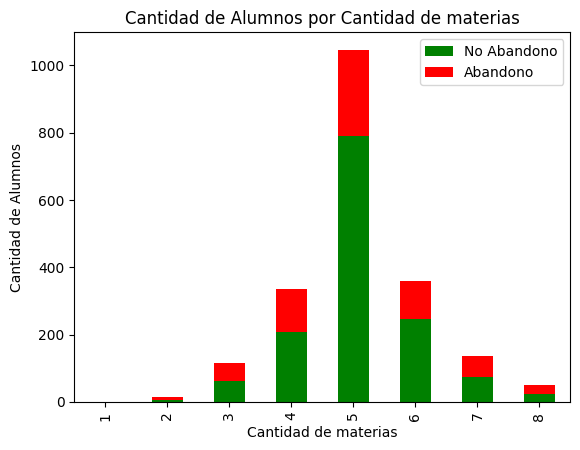

In [ ]:
alumnos_por_cant_materia = df2.groupby('Cant.Materias')['Abandono'].value_counts().unstack()
ax = alumnos_por_cant_materia.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Cantidad de Alumnos por Cantidad de materias')
plt.xlabel('Cantidad de materias')
plt.ylabel('Cantidad de Alumnos')
plt.legend(['No Abandono', 'Abandono'], loc='upper right')
plt.show()

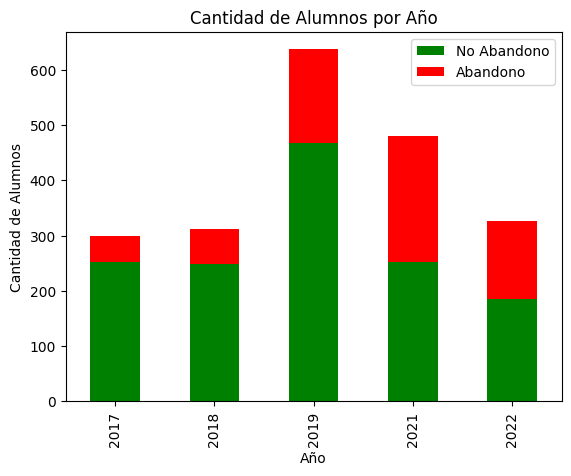

In [ ]:
alumnos_por_año = df2.groupby('Anho')['Abandono'].value_counts().unstack()
ax = alumnos_por_año.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Cantidad de Alumnos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Alumnos')
plt.legend(['No Abandono', 'Abandono'], loc='upper right')
plt.show()

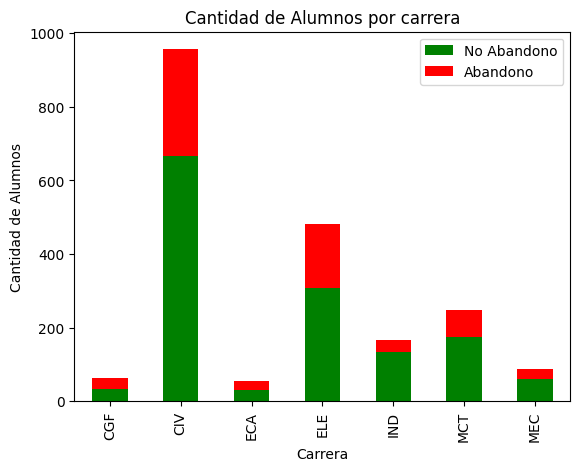

In [ ]:
alumnos_por_carrera = df2.groupby('Cod.Car.Sec')['Abandono'].value_counts().unstack()
ax = alumnos_por_carrera.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Cantidad de Alumnos por carrera')
plt.xlabel('Carrera')
plt.ylabel('Cantidad de Alumnos')
plt.legend(['No Abandono', 'Abandono'], loc='upper right')
plt.show()

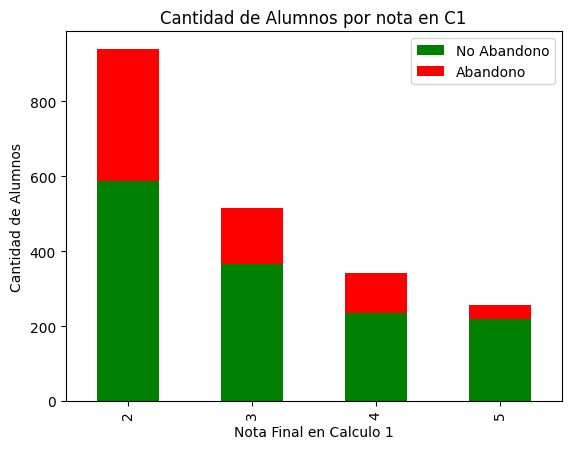

In [ ]:
alumnos_por_nota = df2.groupby('NFC1')['Abandono'].value_counts().unstack()
ax = alumnos_por_nota.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Cantidad de Alumnos por nota en C1')
plt.xlabel('Nota Final en Calculo 1')
plt.ylabel('Cantidad de Alumnos')
plt.legend(['No Abandono', 'Abandono'], loc='upper right')
plt.show()

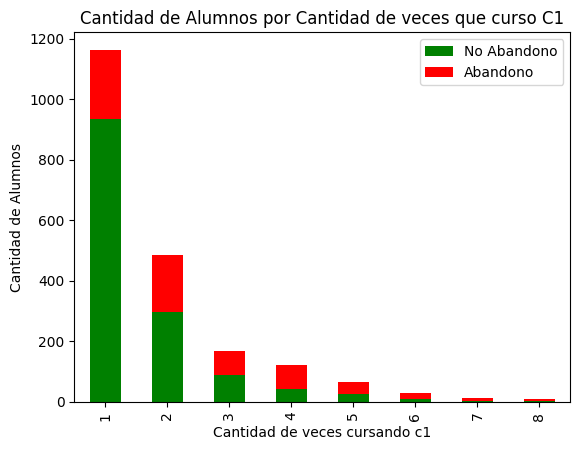

In [ ]:
alumnos_por_cant = df2.groupby('Cant.c1')['Abandono'].value_counts().unstack()
ax = alumnos_por_cant.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Cantidad de Alumnos por Cantidad de veces que curso C1')
plt.xlabel('Cantidad de veces cursando c1')
plt.ylabel('Cantidad de Alumnos')
plt.legend(['No Abandono', 'Abandono'], loc='upper right')
plt.show()

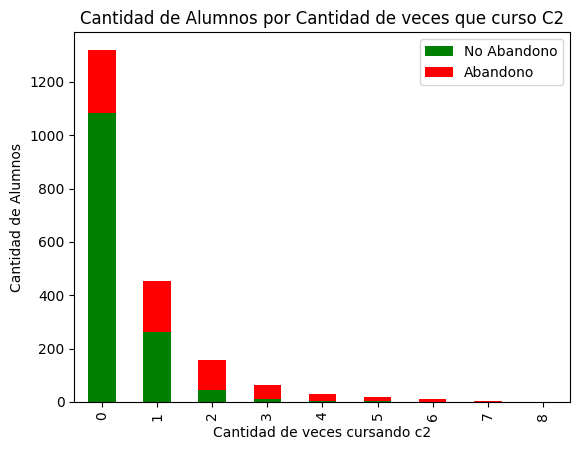

In [ ]:
alumnos_por_cant = df2.groupby('Cant.c2')['Abandono'].value_counts().unstack()
ax = alumnos_por_cant.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Cantidad de Alumnos por Cantidad de veces que curso C2')
plt.xlabel('Cantidad de veces cursando c2')
plt.ylabel('Cantidad de Alumnos')
plt.legend(['No Abandono', 'Abandono'], loc='upper right')
plt.show()

In [ ]:
ruta_archivo = '/content/drive/My Drive/c2_dataset.csv'
df2.to_csv(ruta_archivo, index=False)